# Supervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.utils import resample


%matplotlib inline

### Data description

The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

#### Data Understanding

In [2]:
normal_df = pd.read_csv('data/normal.csv')
type_h_df = pd.read_csv('data/type_h.csv')
type_s_df = pd.read_csv('data/type_s.csv')

In [3]:
normal_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
type_h_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
type_s_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [6]:
normal_df.shape

(100, 7)

In [7]:
normal_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [8]:
type_h_df.shape

(60, 7)

In [9]:
type_h_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [10]:
type_s_df.shape

(150, 7)

In [11]:
type_s_df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [12]:
list(normal_df.columns) == list(type_s_df.columns) == list(type_h_df.columns)

True

It is observed that all the column names are similar

In [13]:
normal_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [14]:
type_h_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [15]:
type_s_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [16]:
normal_df['Class'].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [17]:
type_h_df['Class'].unique()

array(['Type_H', 'type_h'], dtype=object)

In [18]:
type_s_df['Class'].unique()

array(['Type_S', 'tp_s'], dtype=object)

#### Data Preparation and Exploration

In [19]:
normal_df['Class'] = 'normal'
type_h_df['Class'] = 'type_h'
type_s_df['Class'] = 'type_s'

In [20]:
# check if changes are reflected
for df in (normal_df, type_h_df, type_s_df):
    print(df['Class'].unique())

['normal']
['type_h']
['type_s']


Combine all the 3 DataFrames to form a single DataFrame

In [21]:
bio_df = pd.concat([normal_df, type_h_df, type_s_df])

In [22]:
bio_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [23]:
bio_df.shape

(310, 7)

In [24]:
bio_df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
92,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,normal
40,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,type_h
141,67.513053,33.275590,96.283062,34.237463,145.601033,88.301486,type_s
103,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,type_s
28,69.004913,13.291790,55.570143,55.713123,126.611621,10.832011,normal


In [25]:
(bio_df.isnull().sum() * 100)/len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

5-point summary of the new DataFrame

In [26]:
# Median (50th percentile/2nd Quartile), 1st Quartile, 3rd Quartile, Minimum, Maximum

bio_df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### Data Analysis

<AxesSubplot: >

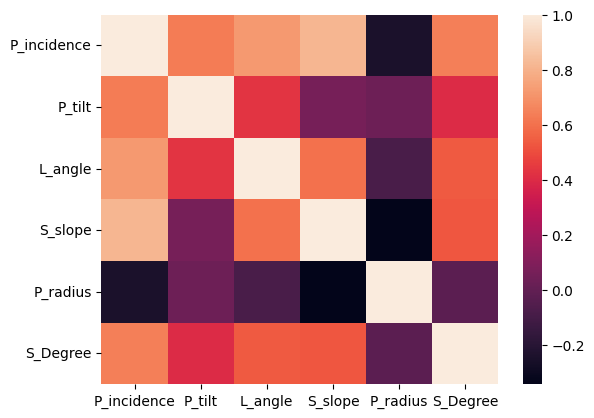

In [27]:
sns.heatmap(bio_df.corr())

Insights on correlation

- Features having stronger correlation with correlation value
    - P_incidence with S_slope, L_Angle have strong correlation
<br> 
<br>
 
- Features having weaker correlation with correlation value
    - P_radius with rest of the features have very poor correlation
    - S_Slope has very less correlation with P_tilt

A pairplot with 3 classes distinguished by colors and share insights

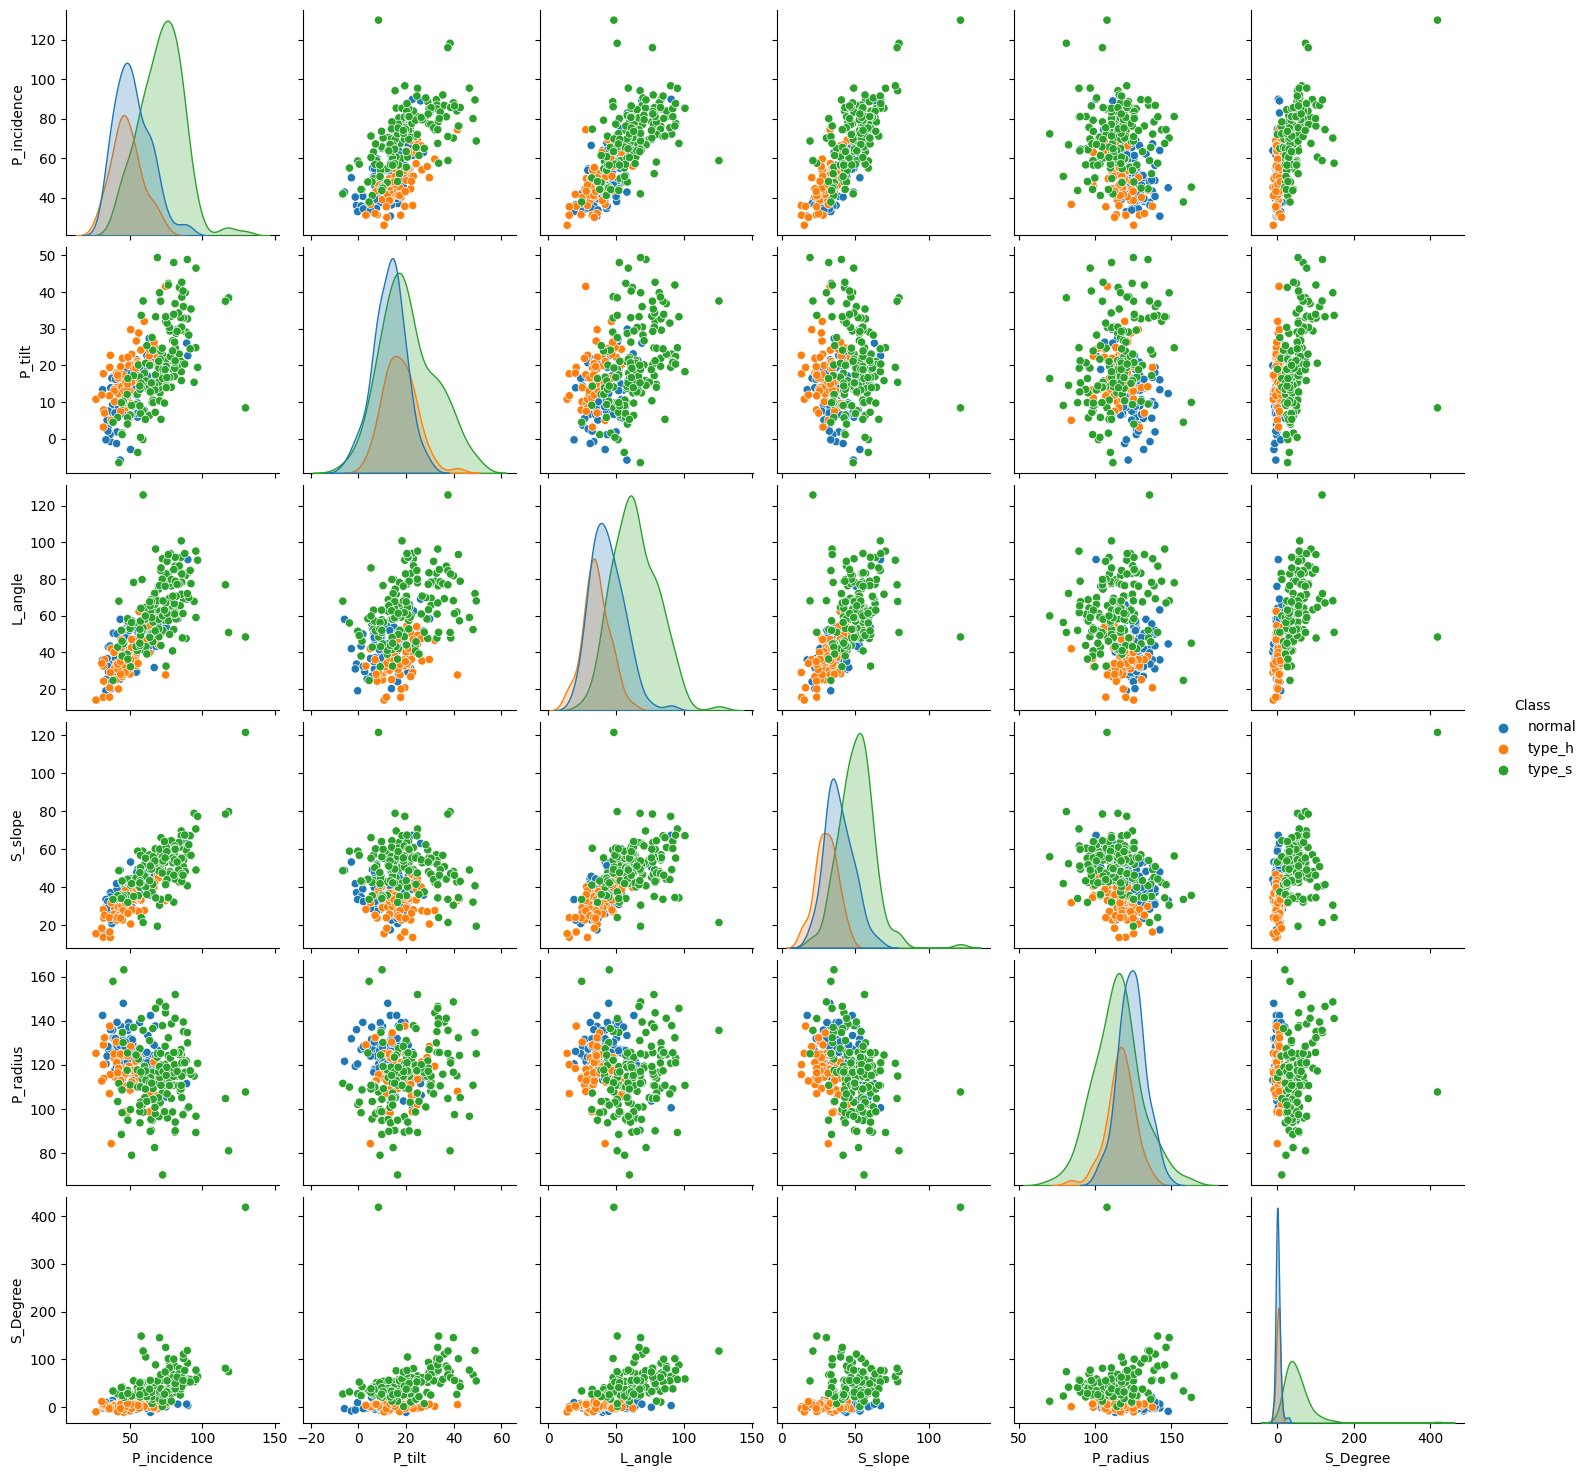

In [28]:
sns.pairplot(bio_df, hue="Class")

- P_incidence has positive linear relation with other variables except for P_radius
- P_tilt shows some positive relation with L_angle
- S_slope has positive relation with L_angle, and S_degree
- P_radius shows weak relation with most of the features
- S_degree shows weak relations with other features

A jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

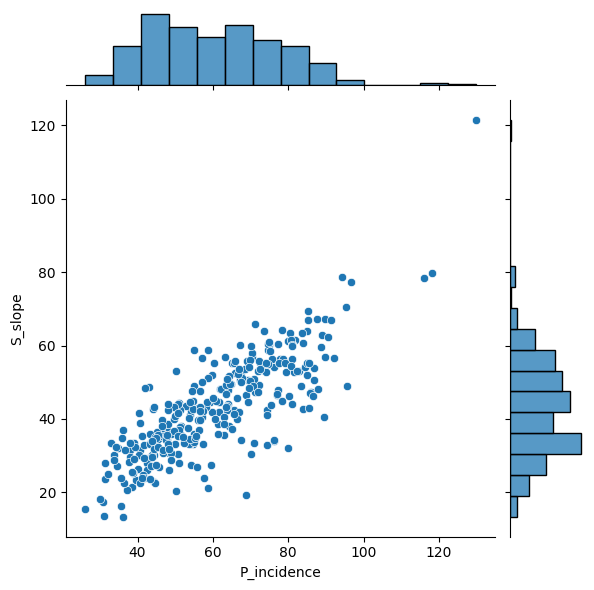

In [29]:
sns.jointplot(data=bio_df, x="P_incidence", y="S_slope")

There is a clear positive correlation observed between P_incidence and S_slope

<AxesSubplot: >

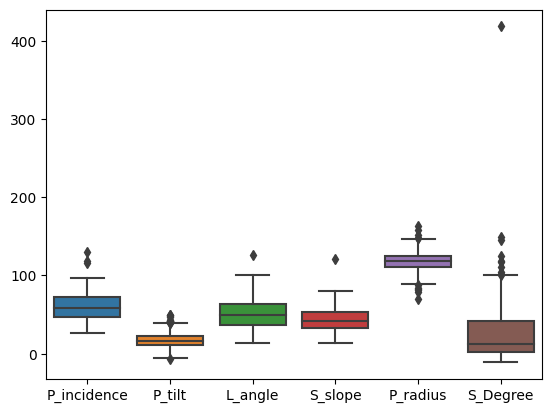

In [30]:
sns.boxplot(data=bio_df)

- In the case of P_radius we can notice some outliers spread on both ends
- For S_Degree one outlier is far apart from the rest of them

#### Model building

In [31]:
# Transform Class column with LabelEncoder
le = LabelEncoder()
bio_df['Class'] = le.fit_transform(bio_df['Class'])

In [32]:
# Set as category type
bio_df['Class'] = bio_df['Class'].astype('category')

In [33]:
bio_df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [34]:
X, y = bio_df.drop(columns='Class'), bio_df['Class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248, 6)
(248,)
(62, 6)
(62,)


In [37]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [38]:
print(f"Accuracy of train data - {neigh.score(X_train, y_train)}")
print(f"Accuracy of test data - {neigh.score(X_test, y_test)}")
print(f"Recall score of test data - {recall_score(y_test, y_pred, average='macro')}")

Accuracy of train data - 0.9233870967741935
Accuracy of test data - 0.8548387096774194
Recall score of test data - 0.8171717171717171


#### Performance Improvement

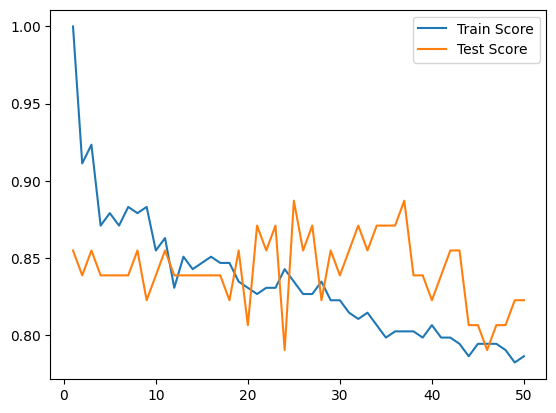

In [39]:
train_score=[]
test_score=[]
for k in range(1,51):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_score.append(knn_model.score(X_train, y_train))
    test_score.append(knn_model.score(X_test, y_test))
    

fig, ax = plt.subplots()

ax.plot(range(1, 51), train_score, label='Train Score')
ax.plot(range(1, 51), test_score, label='Test Score')
ax.legend(loc='upper right')
plt.show()


In [40]:
# Max values based on test and train scores

print(f"Max test score observed - {max(test_score)}") 
print(f"Max train score observed - {max(train_score)}")
print(f"Max test score observed for n_neighbour = {test_score.index(max(test_score))}")
print(f"Max train score observed for n_neighbour = {train_score.index(max(train_score))}")

Max test score observed - 0.8870967741935484
Max train score observed - 1.0
Max test score observed for n_neighbour = 24
Max train score observed for n_neighbour = 0


In [41]:
k_list = list(range(1,30, 2))
k_list


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [42]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....29
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # predict response and evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)


# determining best k
optimal_k = k_list[ac_scores.index(max(ac_scores))]
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 25


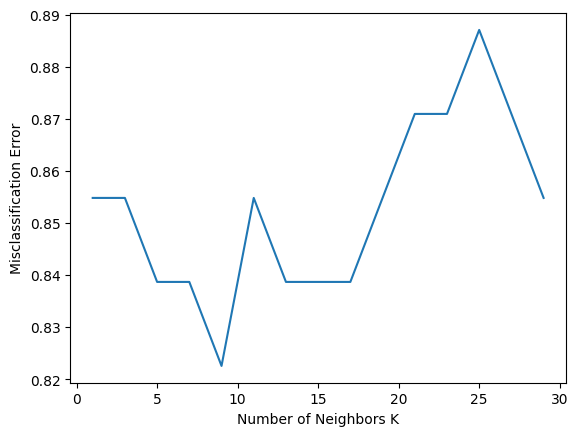

In [43]:
# plot misclassification error vs k
plt.plot(k_list, ac_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred, average='macro'))

0.8870967741935484
0.8656565656565656


- In the base line model the accuracy is 0.85 and recall score is 0.81
- On parameter optimization we get an accuracy of 0.88 and recall score of 0.86
- We have 3% percent improvement on accuracy and 5% imporvement on recall score

### Data Dictionary

- ID: Customer ID
- Age: Customer’s approximate age.
- CustomerSince: Customer of the bank since. [unit is masked]
- HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
- ZipCode: Customer’s zip code.
- HiddenScore: A score associated to the customer which is masked by the bank as an IP.
- MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
- Level: A level associated to the customer which is masked by the bank as an IP.
- Mortgage: Customer’s mortgage. [unit is masked]
- Security: Customer’s security asset with the bank. [unit is masked]
- FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
- InternetBanking: if the customer uses internet banking.
- CreditCard: if the customer uses bank’s credit card.
- LoanOnCard: if the customer has a loan on credit card

#### Data Understanding and Preparation

In [45]:
data_1 = pd.read_csv('data/data1.csv')
data_2 = pd.read_csv('data/data2.csv')

In [46]:
data_1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [47]:
data_2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [48]:
data_1.shape

(5000, 8)

In [49]:
data_2.shape

(5000, 7)

In [50]:
data_1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [51]:
data_2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [52]:
data_1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [53]:
data_2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

Merging both the Dataframes on 'ID' feature to form a single DataFrame

In [54]:
data = pd.merge(data_1, data_2, on="ID")

In [55]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [56]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [57]:
data.shape

(5000, 14)

In [58]:
# Remove ID since it is no longer needed

data.drop('ID',axis=1,inplace=True)

In [59]:
cat_list = ['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for cat in cat_list:
    data[cat]=data[cat].astype('object')

In [60]:
data.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard              object
dtype: object

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


#### Data Exploration and Analysis

Distribution of Target variable ‘LoanOnCard’ and clearly share insights

<AxesSubplot: xlabel='LoanOnCard', ylabel='count'>

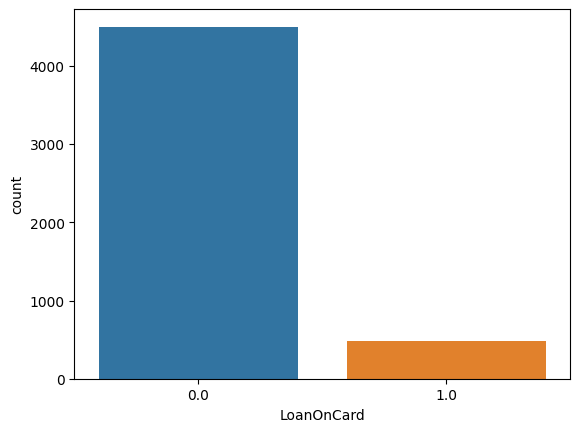

In [62]:
sns.countplot(x=data['LoanOnCard'])

In [63]:
print(f"{len(data[data['LoanOnCard']==0])/len(data)*100}% People don't have loan on card")

90.0% People don't have loan on card


Percentage of missing values and impute if required

In [64]:
data.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [65]:
# Since there is only 20 rows with null values on categorical dependent variable 
# which is 0.4% of overall data, The Null data can be removed

data.dropna(axis=0, inplace=True)

In [66]:
data.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

Unexpected values in each categorical variable and impute with best suitable value

In [67]:
for cat in cat_list:
    print(data[cat].unique())

[1 4 3 2]
[3 2 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1.0 0.0]


In [68]:
# All the categorical variables doesn't have any unexpected values
# but LoanOnCard need to be changed to integer type from float and then to object type

data['LoanOnCard'] = data['LoanOnCard'].astype('int64')
data['LoanOnCard'] = data['LoanOnCard'].astype('category')

In [69]:
data['LoanOnCard'].unique()

[1, 0]
Categories (2, int64): [0, 1]

#### Data Preparation and model building

In [70]:
# Dropping ZipCode column

data.drop(columns='ZipCode', inplace=True)

In [71]:
data.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [72]:
# Split data into X and y

X, y = data.drop(columns='LoanOnCard'), data['LoanOnCard']

In [73]:
X.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,1,8.9,3,0,0,0,0,0
10,65,39,105,4,2.4,3,0,0,0,0,0
11,29,5,45,3,0.1,2,0,0,0,1,0
12,48,23,114,2,3.8,3,0,1,0,0,0
13,59,32,40,4,2.5,2,0,0,0,1,0


In [74]:
y.head()

9     1
10    0
11    0
12    0
13    0
Name: LoanOnCard, dtype: category
Categories (2, int64): [0, 1]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
X_train.shape

(3735, 11)

In [77]:
X_test.shape

(1245, 11)

In [78]:
# Baseline Logistic Regression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/blue_server/.cache/pypoetry/virtualenvs/ml-notebooks-DCcSVd8V-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
clf.score(X_test, y_test)

0.9421686746987952

On training with default paramters in Logistic regression we get an accuracy of 94.2%

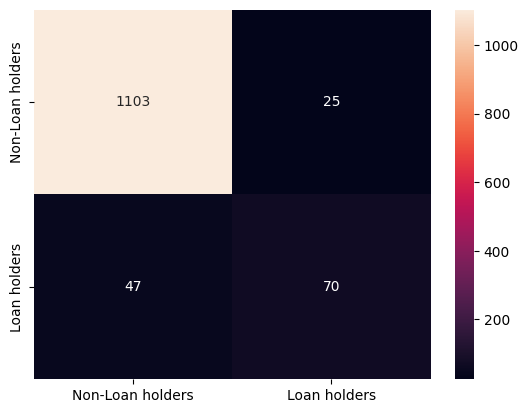

In [80]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1128
           1       0.74      0.60      0.66       117

    accuracy                           0.94      1245
   macro avg       0.85      0.79      0.81      1245
weighted avg       0.94      0.94      0.94      1245



- It is observed that the model performs well when predicting **Class 0**, with precision, recall and f1 score of 96, 99,and 98 respectively.
- The model is predicts **Class 1** with precision, recall, and f1 score of 88, 63, and 73 respectively.
- The model performs fairly well for Class 0 but the same cannot be said for Class 1

Balance the data

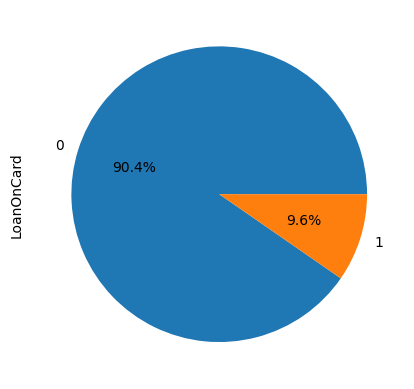

In [82]:
data['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

90.4% of the people don't have Loan on card and 9.6% have loan on card

In [83]:
data['LoanOnCard'].value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

In [84]:
df_majority_downsampled = resample(
    data[data["LoanOnCard"] == 0],
    replace=False,  # sample without replacement
    n_samples=480,   # match minority class
    random_state=42,
)
df_majority_downsampled.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
2612,50,26,40,4,1.10,2,131,0,0,0,0,0
4113,28,2,41,3,1.10,2,161,0,0,1,0,0
3332,36,9,49,2,1.67,2,0,0,0,0,1,0
3352,34,4,19,1,0.67,3,83,0,0,1,0,0
541,30,6,141,2,4.33,1,0,0,0,0,0,0


In [85]:
df_downsampled = pd.concat([df_majority_downsampled, data[data["LoanOnCard"] == 1]])
df_downsampled['LoanOnCard'].value_counts()

0    480
1    480
Name: LoanOnCard, dtype: int64

Again training the same previous model on balanced data

In [86]:
X, y = df_downsampled.drop(columns='LoanOnCard'), df_downsampled['LoanOnCard']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf_new = LogisticRegression()
clf_new.fit(X_train, y_train)
clf_new.score(X_test, y_test)

/home/blue_server/.cache/pypoetry/virtualenvs/ml-notebooks-DCcSVd8V-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9

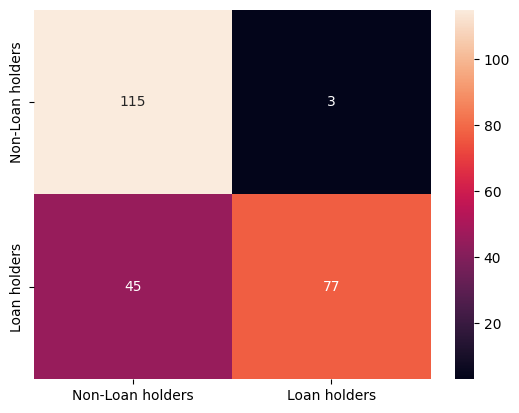

In [87]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       118
           1       0.96      0.63      0.76       122

    accuracy                           0.80       240
   macro avg       0.84      0.80      0.79       240
weighted avg       0.84      0.80      0.79       240



On balancing the two classes we can observe that although the precision, recall and f1-score has decreased compared to previous model for **Class 0**
the same metrics have improved for **Class 1** compared to previous model.

In [89]:
# Alternate method by using class_weight="balanced"
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data 
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

X, y = data.drop(columns='LoanOnCard'), data['LoanOnCard']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

/home/blue_server/.cache/pypoetry/virtualenvs/ml-notebooks-DCcSVd8V-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [90]:
clf.score(X_test, y_test)

0.8746987951807229

In [91]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1128
           1       0.42      0.88      0.57       117

    accuracy                           0.87      1245
   macro avg       0.70      0.88      0.75      1245
weighted avg       0.93      0.87      0.89      1245



With this approach the recall score for **Class 1** is significantly improved but precision score has taken a hit

#### Performance Improvement

In [92]:
# Starting with SVC

# Train test split
X, y = data.drop(columns='LoanOnCard'), data['LoanOnCard']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc_model = SVC(class_weight="balanced")
svc_model.fit(X_train, y_train)
print(f"SVC model score - {svc_model.score(X_test, y_test)}")

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print(f"KNN model score - {knn_model.score(X_test, y_test)}")

print("\n\n")
print("---Classification Report for SVC---")
print(classification_report(y_test, svc_model.predict(X_test)))

print("---Classification Report for KNN---")
print(classification_report(y_test, knn_model.predict(X_test)))


SVC model score - 0.8112449799196787
KNN model score - 0.9132530120481928



---Classification Report for SVC---
              precision    recall  f1-score   support

           0       0.98      0.80      0.89      1128
           1       0.32      0.88      0.47       117

    accuracy                           0.81      1245
   macro avg       0.65      0.84      0.68      1245
weighted avg       0.92      0.81      0.85      1245

---Classification Report for KNN---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1128
           1       0.55      0.39      0.46       117

    accuracy                           0.91      1245
   macro avg       0.75      0.68      0.71      1245
weighted avg       0.90      0.91      0.91      1245



In [93]:
# Starting with KNN
ac_scores = []

# perform accuracy metrics for values from 1,3,5....29
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # predict response and evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)


# determining best k

optimal_k = k_list[ac_scores.index(max(ac_scores))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


There is a bias due to un-balanced class and the class label assigned to a query vector is determined by a majority vote amongst the K-Nearest neighbors of the query vector.

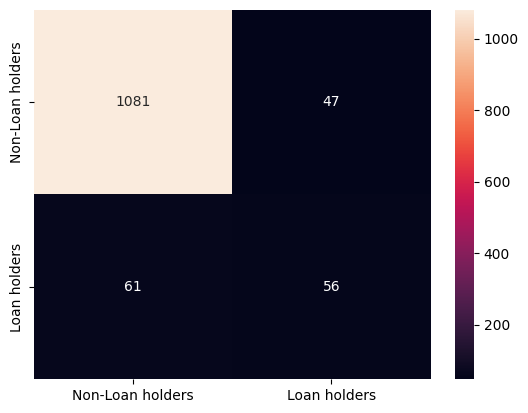

In [94]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()


In [95]:
svc_scores = []
for gamma in [0.1, 1, 10, 100]:
    for C in [0.1, 1, 10, 100]:
        svc_model = SVC(gamma=gamma, class_weight="balanced", C=C, kernel='rbf')
        svc_model.fit(X_train, y_train)
        svc_scores.append({
            "score": svc_model.score(X_test, y_test),
            "C": C,
            "gamma": gamma
        })

In [96]:
svc_scores

[{'score': 0.8722891566265061, 'C': 0.1, 'gamma': 0.1},
 {'score': 0.9156626506024096, 'C': 1, 'gamma': 0.1},
 {'score': 0.9164658634538153, 'C': 10, 'gamma': 0.1},
 {'score': 0.9156626506024096, 'C': 100, 'gamma': 0.1},
 {'score': 0.9060240963855422, 'C': 0.1, 'gamma': 1},
 {'score': 0.9060240963855422, 'C': 1, 'gamma': 1},
 {'score': 0.9060240963855422, 'C': 10, 'gamma': 1},
 {'score': 0.9060240963855422, 'C': 100, 'gamma': 1},
 {'score': 0.9060240963855422, 'C': 0.1, 'gamma': 10},
 {'score': 0.9060240963855422, 'C': 1, 'gamma': 10},
 {'score': 0.9060240963855422, 'C': 10, 'gamma': 10},
 {'score': 0.9060240963855422, 'C': 100, 'gamma': 10},
 {'score': 0.9060240963855422, 'C': 0.1, 'gamma': 100},
 {'score': 0.9060240963855422, 'C': 1, 'gamma': 100},
 {'score': 0.9060240963855422, 'C': 10, 'gamma': 100},
 {'score': 0.9060240963855422, 'C': 100, 'gamma': 100}]

In [97]:
sorted_values = sorted(svc_scores, key=lambda x: x['score'], reverse=True) 

best_params = sorted_values[0]
print(f"Parameters for maximum accuracy ({best_params['score']}) - C={best_params['C']}, gamma={best_params['gamma']}")

Parameters for maximum accuracy (0.9164658634538153) - C=10, gamma=0.1


The SVC performs fairly well compared to KNN and also takes into account the class imbalance. We can choose SVC as our final model.

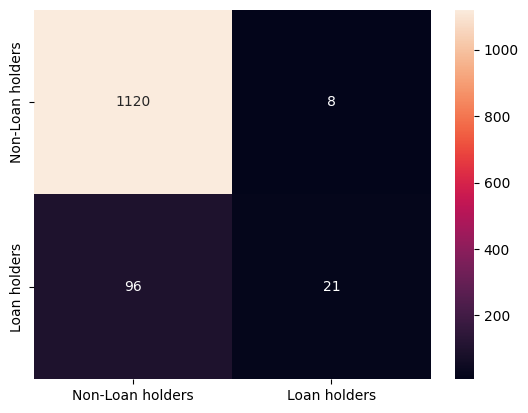

In [98]:
# Visualizing confusion matrix for SVC

svc_model = SVC(gamma=0.1, class_weight="balanced", C=10, kernel='rbf', probability=True)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Non-Loan holders", "Loan holders"]],
    columns=[i for i in ["Non-Loan holders", "Loan holders"]],
)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

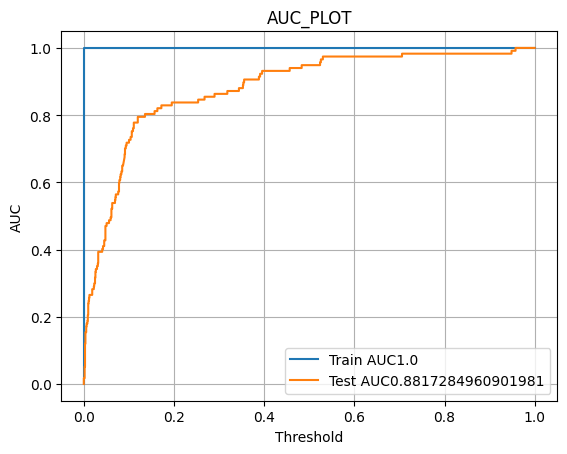

In [99]:
y_train_pred = svc_model.predict_proba(X_train)
y_test_pred = svc_model.predict_proba(X_test)
train_fpr, train_tpr, tr_threshold = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, ts_threshold = roc_curve(y_test, y_test_pred[:, 1])
plt.plot(train_fpr, train_tpr, label="Train AUC" + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC" + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("AUC")
plt.title("AUC_PLOT")
plt.grid()


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1128
           1       0.72      0.18      0.29       117

    accuracy                           0.92      1245
   macro avg       0.82      0.59      0.62      1245
weighted avg       0.90      0.92      0.89      1245



- The model accuracy in the case of SVC post tuning of parameters has increased by 10%.
- The precision score has imporved by 40 for **Class 1** but recall and f1-score has dropped compared to the baseline SVM Model.
- In the case of **Class 0**, the recall score has been improved.